## ACTIVITY 8: SENTIMENT ANALYSIS

##### Name: Gerald Darwin D. Lariosa

*Date: April 2, 2025*

### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


### Load Dataset

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Function for Text Preprocessing

In [ ]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'<.*?>', '', text)  
    text = re.sub(r'[^a-z\s]', '', text)  
    text = text.strip() 
    return text


### Apply Preprocessing to Column 'review' and Apply It again In the df

In [ ]:
df['review'] = df['review'].apply(preprocess_text)
df.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


### Transforms Text to Numbers, Then Splits into Train/Test Sets

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Trains and Evaluates SVM, Logistic Regression, and Naive Bayes Models, Printing their Classification Accuracies

In [ ]:
models = {
    'SVM': LinearSVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


SVM Accuracy: 0.8920
Logistic Regression Accuracy: 0.8915
Naive Bayes Accuracy: 0.8660


### Visualize the Accuracy of the Trained Sentiment Analysis Models

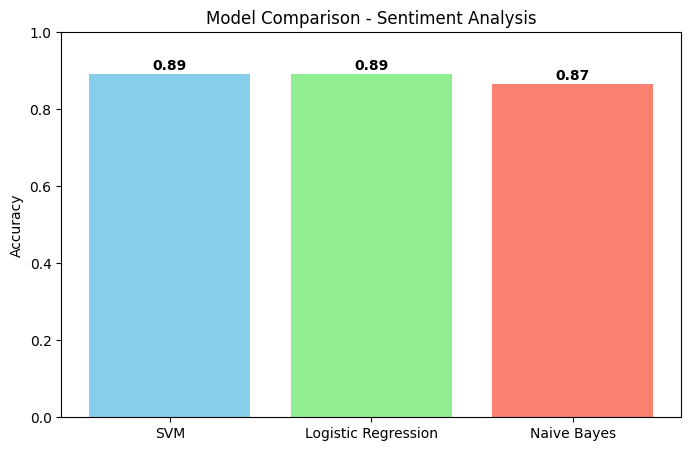

In [ ]:
plt.figure(figsize=(8,5))
names = list(accuracies.keys())
values = list(accuracies.values())
plt.bar(names, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Model Comparison - Sentiment Analysis')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


### Generates and Displays the Confusion Matrix for Each Trained Sentiment Analysis Model

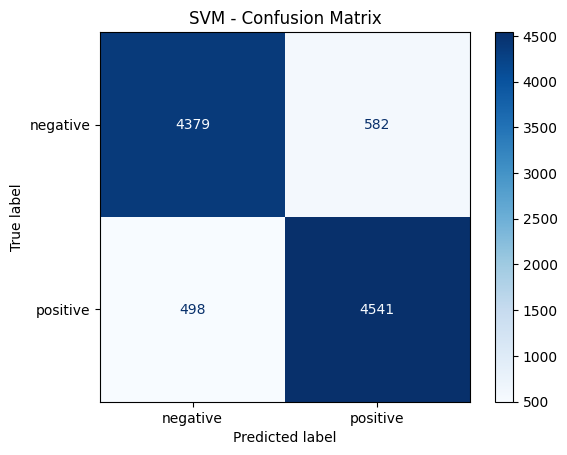

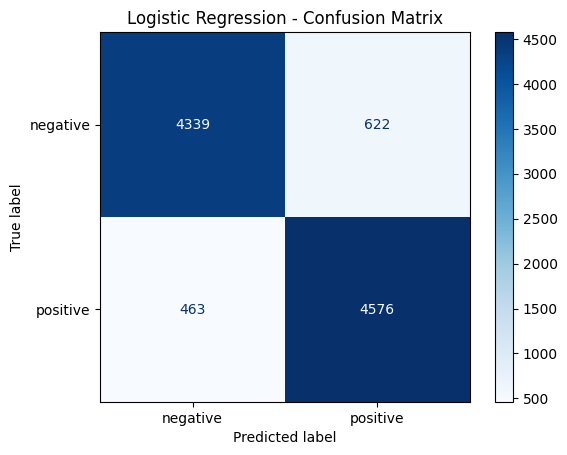

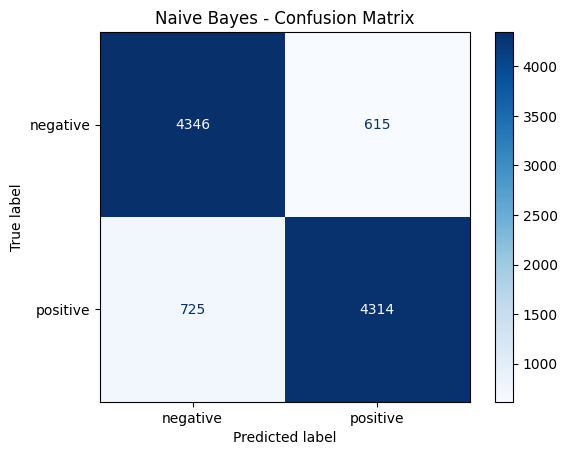

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


### Generates and Prints the Classification Report for Each Trained Sentiment Analysis Model

In [ ]:
from sklearn.metrics import classification_report

for name, model in models.items():
    preds = model.predict(X_test)
    print(f'{name} - Classification Report:\n')
    print(classification_report(y_test, preds))
    print('-' * 50)


SVM - Classification Report:

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

--------------------------------------------------
Logistic Regression - Classification Report:

              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

--------------------------------------------------
Naive Bayes - Classification Report:

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4961
    positive       0.

### Generates and Displays the Receiver Operating Characteristic (ROC) Curve for Each Trained Sentiment Analysis Model

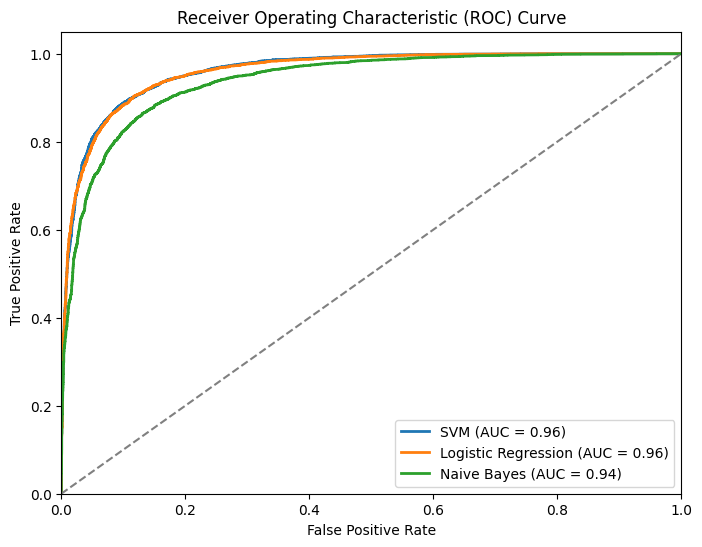

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
